## Lab 4 - part 2: Data Weights and Autocorellation

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



## Exercise 4a: Spatial Autocorrelation and ESDA 

USE the Liverpool IMD data we have been using in previous sessions. This will require you to:

* Load up the IMD dataset for Liverpool.
* Create a choropleth of the `imd_score` variable.
* Compute the spatial weights matrix for the LSOAs. Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.
* Create the standardized version of the IMD scores.
* Calculate the spatial lag of the standardized scores.
* Create the Moran Plot.
* Calculate the value of Moran's I as well as its significance level.
* Perform a LISA analysis and generate a map of the results. What are the main patterns?

In [3]:
# your code here


For this part I would like you to experiment with Data from Amstedam. However this will require you to find the dataset yourself!

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.

## Question 2: Calculating Moran’s I

Write a function calculate_morans_i that:

    Takes a spatial weight matrix W and an attribute array y.
    Calculates Moran’s I for the given attribute array.
    Returns the Moran’s I value and its p-value.

## Question 3: Standardizing Spatial Weight Matrices

Create a function standardize_weights that:

    Takes a spatial weight matrix W.
    Standardizes it so that the weights of each row sum to one.
    Returns the standardized weight matrix.

## Question 4: Creating Distance-Based Weights

Write a function create_distance_weights that:

    Takes a set of point coordinates and a threshold distance.
    Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    Returns the weight matrix.

## Question 5: Visualizing a Moran Plot

Using PySAL, write a function plot_moran that:

    Takes a spatial weights matrix W and an attribute array y.
    Creates and displays a Moran plot for the attribute.
    Saves the Moran plot as an image file.

In [1]:
# your code here 
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from esda.moran import Moran
from splot.esda import moran_scatterplot
from libpysal.weights import Queen


In [7]:
# Path to the shape file  
shapefile_path = "C:/Users/hakna/Desktop/pp/myenv/lab-04/IMD/lab04_imd.shp"

# # Geospatial dataset
liverpool_data = gpd.read_file(shapefile_path)

# Checking the column names in the data set
print("Colums:", liverpool_data.columns)

# Check the column names in the dataset
print(liverpool_data.head())


Colums: Index(['lsoa11cd', 'lsoa11nm', 'lsoa11nmw', 'st_areasha', 'st_lengths',
       'IMD_Rank', 'IMD_Decile', 'LSOA01NM', 'LADcd', 'LADnm', 'IMDScore',
       'IMDRank0', 'IMDDec0', 'IncScore', 'IncRank', 'IncDec', 'EmpScore',
       'EmpRank', 'EmpDec', 'EduScore', 'EduRank', 'EduDec', 'HDDScore',
       'HDDRank', 'HDDDec', 'CriScore', 'CriRank', 'CriDec', 'BHSScore',
       'BHSRank', 'BHSDec', 'EnvScore', 'EnvRank', 'EnvDec', 'IDCScore',
       'IDCRank', 'IDCDec', 'IDOScore', 'IDORank', 'IDODec', 'CYPScore',
       'CYPRank', 'CYPDec', 'ASScore', 'ASRank', 'ASDec', 'GBScore', 'GBRank',
       'GBDec', 'WBScore', 'WBRank', 'WBDec', 'IndScore', 'IndRank', 'IndDec',
       'OutScore', 'OutRank', 'OutDec', 'TotPop', 'DepChi', 'Pop16_59',
       'Pop60+', 'WorkPop', 'geometry'],
      dtype='object')
    lsoa11cd                   lsoa11nm                  lsoa11nmw  \
0  E01000001        City of London 001A        City of London 001A   
1  E01000002        City of London 001B      

In [12]:
# Create a spatial weights matrix using Queen contiguity
w = Queen.from_dataframe(liverpool_data)

# Spatial Weight
print("Summary of Spatial Weight Matrix:", w)


C:\Users\hakna\AppData\Local\Temp\ipykernel_14812\3674220406.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(liverpool_data)


Summary of Spatial Weight Matrix: <libpysal.weights.contiguity.Queen object at 0x00000295B75E0DD0>


c:\Users\hakna\anaconda3\envs\myenv\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There is 1 island with id: 18535.
  W.__init__(self, neighbors, ids=ids, **kw)


In [14]:
# Select and standardize the IMD score column
liverpool_data['IMD_standardized'] = (liverpool_data['IMDScore'] - liverpool_data['IMDScore'].mean()) / liverpool_data['IMDScore'].std()

# Show standardized values
print(liverpool_data[['IMDScore', 'IMD_standardized']].head())


   IMDScore  IMD_standardized
0     6.208         -1.008424
1     5.143         -1.077886
2    19.402         -0.147884
3    28.652          0.455420
4    19.837         -0.119512


In [18]:
# Calculate Morans I
moran = Moran(liverpool_data['IMD_standardized'], w)

# Print Moran's I ve p-value
print(f"Moran's I: {moran.I}")
print(f"P-value: {moran.p_sim}")


Moran's I: 0.6031245807165553
P-value: 0.001


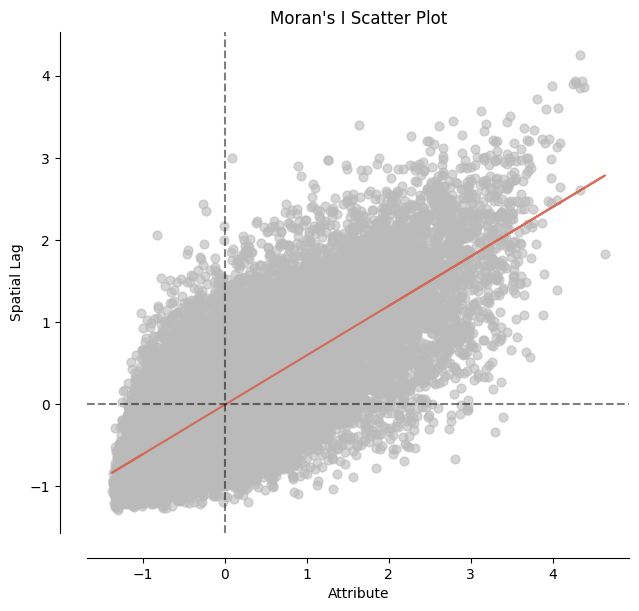

In [19]:
# Create a Moran Scatter Plot
fig, ax = moran_scatterplot(moran)
plt.title("Moran's I Scatter Plot")
plt.show()
